In [1]:
from fastai.data.all import *
from fastai.vision.all import *
from fastbook import *
import pandas as pd
import matplotlib as plt

In [2]:
import numpy as np

In [3]:
# !pip install kaggle

In [4]:
import torch
import torchvision.models as models
from torch.profiler import profile, record_function, ProfilerActivity

In [5]:
cred_path = Path('~/PycharmProjects/zzstephen/DL/kaggle.json').expanduser()

In [6]:
cred_path

Path('/Users/stephenzhou/PycharmProjects/zzstephen/DL/kaggle.json')

In [7]:
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write(creds)
    cred_path.chmod(0o600)

In [8]:
path = Path('~/download_data/bluebook-for-bulldozers').expanduser()

In [9]:
path

Path('/Users/stephenzhou/download_data/bluebook-for-bulldozers')

In [10]:
# if not path.exists():
#     path.mkdir()
#     api.competition_download_cli('bluebook-for-bulldozers', path=path)
#     file_extract(path/'bluebook-for-bulldozers.zip')

In [11]:
path.ls(file_type='text')

(#7) [Path('/Users/stephenzhou/download_data/bluebook-for-bulldozers/random_forest_benchmark_test.csv'),Path('/Users/stephenzhou/download_data/bluebook-for-bulldozers/Valid.csv'),Path('/Users/stephenzhou/download_data/bluebook-for-bulldozers/median_benchmark.csv'),Path('/Users/stephenzhou/download_data/bluebook-for-bulldozers/Test.csv'),Path('/Users/stephenzhou/download_data/bluebook-for-bulldozers/ValidSolution.csv'),Path('/Users/stephenzhou/download_data/bluebook-for-bulldozers/Machine_Appendix.csv'),Path('/Users/stephenzhou/download_data/bluebook-for-bulldozers/TrainAndValid.csv')]

In [12]:
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [14]:
sorted(df['YearMade'].unique())

[1000,
 1919,
 1920,
 1937,
 1942,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

In [15]:
df['log_price'] = np.log(df['SalePrice'])

In [16]:
df['log_price']

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
            ...    
412693     9.210340
412694     9.259131
412695     9.433484
412696     9.210340
412697     9.472705
Name: log_price, Length: 412698, dtype: float64

<Axes: >

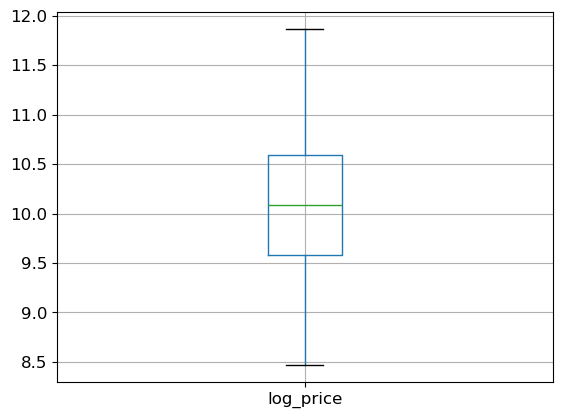

In [17]:
df[['log_price']].boxplot()

In [18]:
sorted(df['state'].unique())

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Unspecified',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'Washington DC',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

In [19]:
df.plot.scatter(x='YearMade', y='log_price')

<Axes: xlabel='YearMade', ylabel='log_price'>

In [20]:
df['UsageBand'].value_counts()

UsageBand
Medium    35832
Low       25311
High      12527
Name: count, dtype: int64

In [21]:
df['ProductGroupDesc'].describe()

count               412698
unique                   6
top       Track Excavators
freq                104230
Name: ProductGroupDesc, dtype: object

In [22]:
df['ProductGroup'].unique()

array(['WL', 'SSL', 'TEX', 'BL', 'TTT', 'MG'], dtype=object)

In [28]:
df['Tire_Size'].value_counts()

Tire_Size
None or Unspecified    47823
20.5                   15773
14"                     9111
23.5                    8760
26.5                    4635
17.5                    3971
29.5                    2767
17.5"                   1815
13"                      776
20.5"                    737
15.5                     610
15.5"                    463
23.5"                    309
7.0"                      56
23.1"                     20
10"                        9
10 inch                    3
Name: count, dtype: int64

In [26]:
df_tire = df[['Tire_Size','log_price']].loc[(df['Tire_Size']!='10 inch') & (df['Tire_Size']!='None or Unspecified')].copy()

In [38]:
df_tire['Tire_Size'].replace("\'\'",'')

1         23.5
2          NaN
3          NaN
4          NaN
5          NaN
          ... 
412693     NaN
412694     NaN
412695     NaN
412696     NaN
412697     NaN
Name: Tire_Size, Length: 364872, dtype: object

In [40]:
df_tire['Tire_Size'].value_counts()

Tire_Size
20.5     15773
14"       9111
23.5      8760
26.5      4635
17.5      3971
29.5      2767
17.5"     1815
13"        776
20.5"      737
15.5       610
15.5"      463
23.5"      309
7.0"        56
23.1"       20
10"          9
Name: count, dtype: int64

In [ ]:
df_tire.plot.scatter(x='Tire_Size', y='log_price')